In [97]:
import pandas as pd
import numpy as np
import string


In [4]:
 df = pd.read_csv("spam.csv", encoding='latin1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

#### DATA CLEANING

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# DROP LAST THREE COLS AS MOST OF THE VALUES ARE NULL
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample()


,v1,v2
2369,ham,A Boy loved a gal. He propsd bt she didnt mind...


In [14]:
# RENAMING THE COLUMNS
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [15]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# APPLYING LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [19]:
df['target']=encoder.fit_transform(df['target'])

In [20]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
# check duplicate value
df.duplicated().sum()

403

In [22]:
#drop duplicates
df.drop_duplicates(keep="first",inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(5169, 2)

#### EDA

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
data1=df['target'].value_counts()

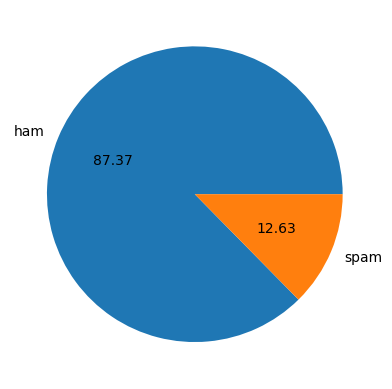

In [31]:
import matplotlib.pyplot as plt
plt.pie(data1,labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [32]:
# Data is Imbalanced (spam is less and ham is more")
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
df['num_chars']=df['text'].apply(len) #apply length function is applied to each col

In [35]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
# fetch words from the sentence
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# word tokenise break the sentence son the basis of words

In [39]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [42]:
# fetch words on the basis of sentences
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
# ham messages
df[df['target']==0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
# spam messages
df[df['target']==1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [47]:
# the above analysis tells us that the spam message are slightly bigger than ham messages
import seaborn as sns

D:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_chars', ylabel='Count'>

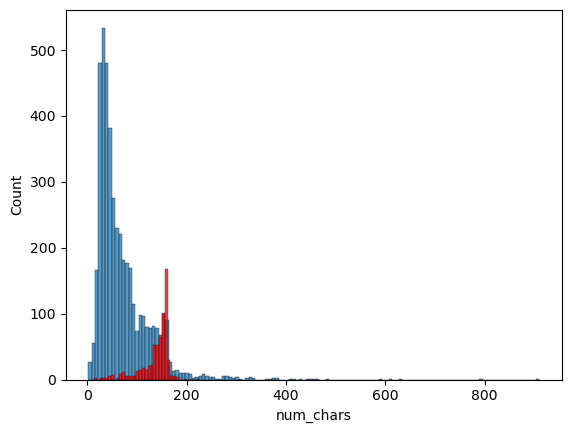

In [54]:
# HISTOGRAM TO SHOW THE RELATION OF NUMBER OF WORDS WITH COUNT AND SHOWING WHICH OF THE CATEGORY HAS MORE SPAM AND NOT SPAM MESSAGES 
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'],color='red',legend=True)


D:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

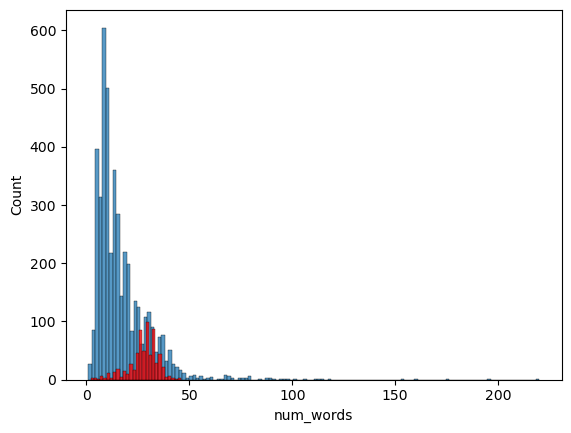

In [55]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red',legend=True)


D:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


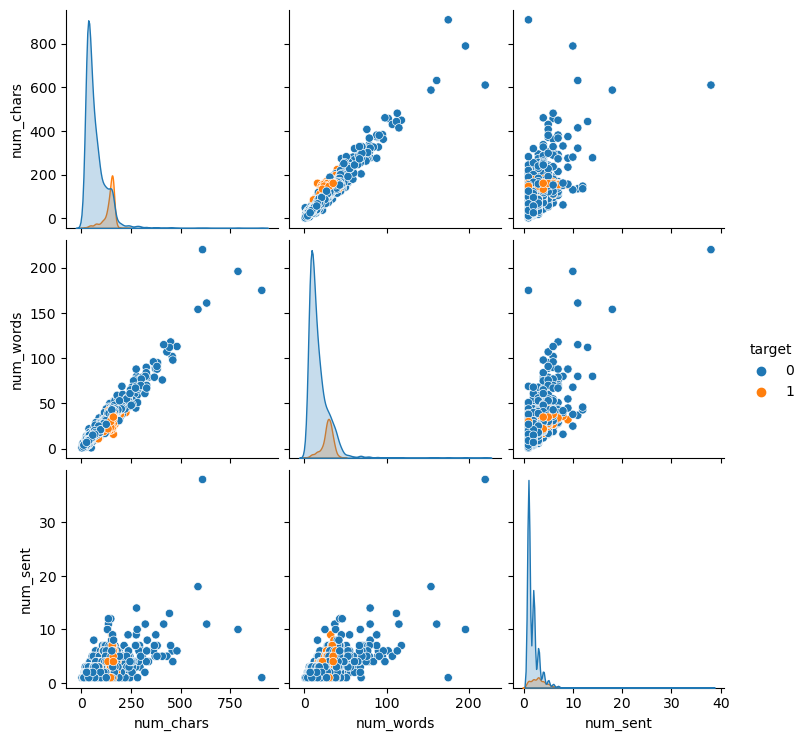

In [56]:
sns.pairplot(df,hue='target')

In [67]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [66]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   target     5169 non-null   int32 
 1   text       5169 non-null   object
 2   num_chars  5169 non-null   int64 
 3   num_words  5169 non-null   int64 
 4   num_sent   5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [68]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   target     5169 non-null   int32 
 1   text       5169 non-null   object
 2   num_chars  5169 non-null   int64 
 3   num_words  5169 non-null   int64 
 4   num_sent   5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [76]:
numeric_df = df.select_dtypes(include='number')
# Calculate correlation matrix
numeric_df.corr()


,target,num_chars,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

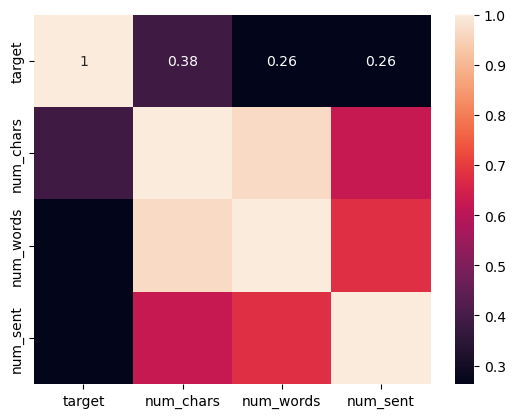

In [77]:
sns.heatmap(numeric_df.corr(),annot=True)

#### TEXT PREPROCESSING
###### lower case
###### Tokensisation
###### Removing special characters
###### Removing stop words and punctuation
###### stemming


In [103]:
def transform_text(text):
    text=text.lower() #LOWER CASE
    text=nltk.word_tokenize(text) # TOKENISATION
    # REMOVING SPECIAL CHARACTERS
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:] # cloning 
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
         y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [93]:
from nltk.corpus import stopwords 

# Download the stopwords if you haven't already
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')
stop_words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [104]:
transform_text("HI HOW ARE 20  %% YOU GRACY WHAT ABOUT YOU SWEEETYYYYYY")

'hi 20 graci sweeetyyyyyy'

In [100]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer() # stemmer bring the every word into its root form


'danc'

In [110]:

df['transformed']=df['text'].apply(transform_text)

In [111]:
df.head()

,target,text,num_chars,num_words,num_sent,transform,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [124]:
# word cloud module  (PURPOSE:DISPLAY THE MESSAGES THAT ARE IMPORTANT)
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [125]:
spam_wc=wc.generate(df[df['target']==1]['transformed'].str.cat(sep=" "))

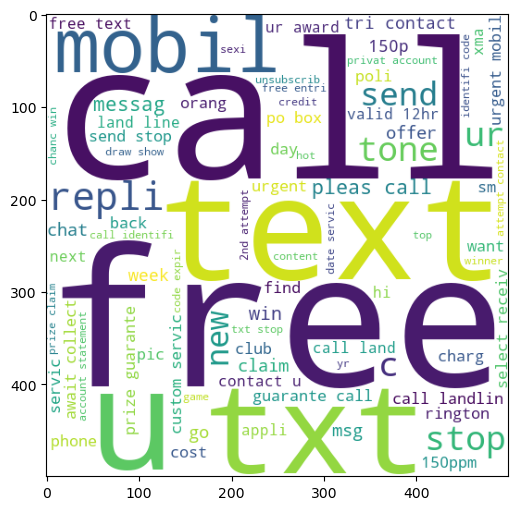

In [127]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

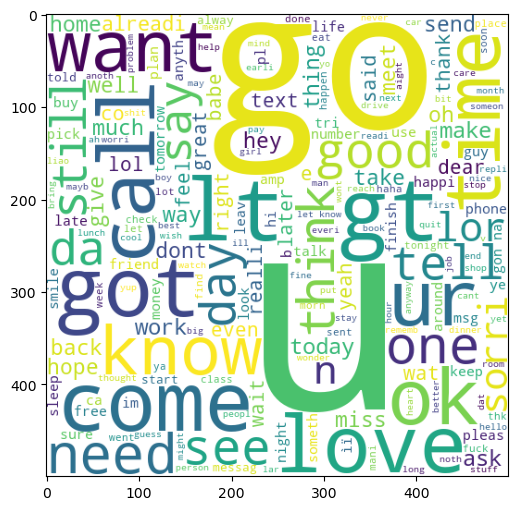

In [128]:
ham_wc=wc.generate(df[df['target']==0]['transformed'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [129]:
df.head()

,target,text,num_chars,num_words,num_sent,transform,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [136]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed'].tolist():
    for word in msg.split():
         spam_corpus.append(word)

In [137]:
len(spam_corpus)

9939

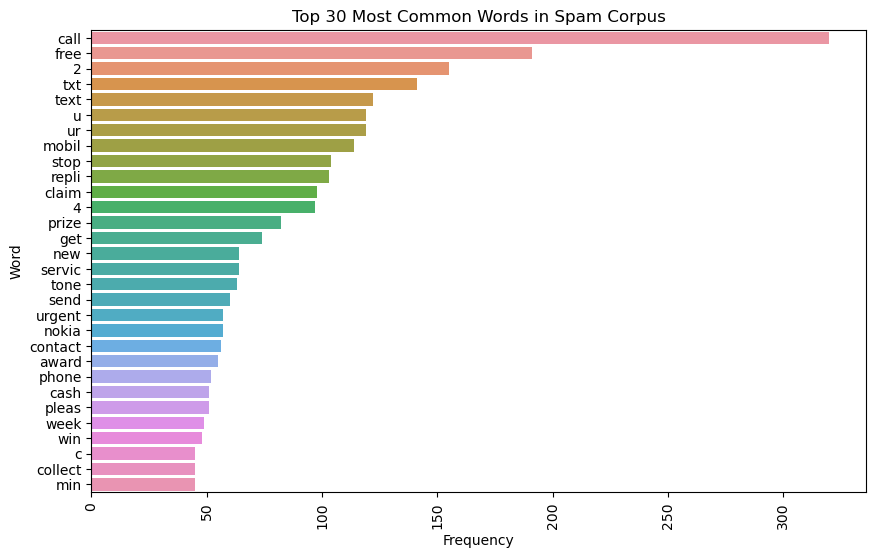

In [143]:
from collections import Counter # this library contains counter module which counts te frequency and stores in the dictionary
most_common_words = Counter(spam_corpus).most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=most_common_df)
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [144]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed'].tolist():
    for word in msg.split():
         ham_corpus.append(word)

In [145]:
len(ham_corpus)

35404

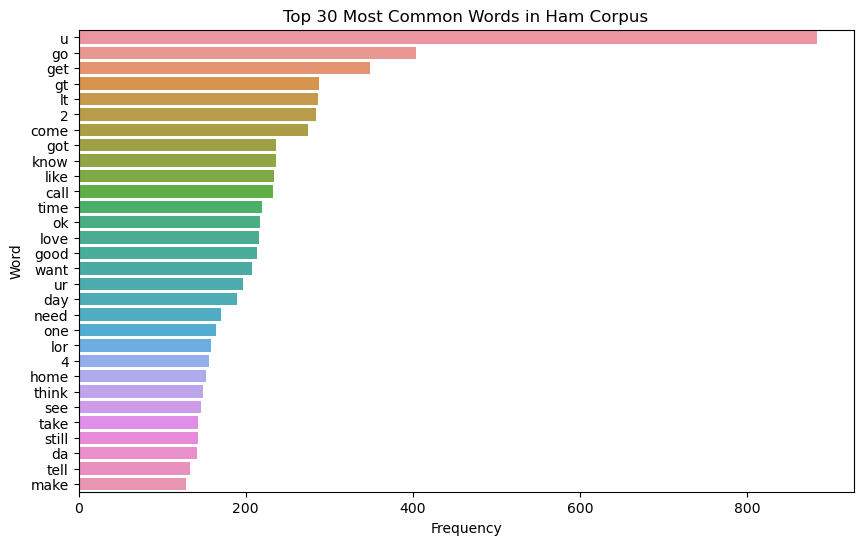

In [146]:
from collections import Counter # this library contains counter module which counts te frequency and stores in the dictionary
most_common_words = Counter(ham_corpus).most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=most_common_df)
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

#### MODEL BUILDING


In [166]:
# Naive Bayes 
# step1 :converting our inputs to numbers or vectorize
# when the data is inconsistent/imbalance that means one quantity is big and one quantity is less then precision is more important than accuracy
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [167]:
x=tfidf.fit_transform(df['transformed']).toarray()

In [168]:
x.shape #5169 sms and 6708 words

(5169, 6708)

In [169]:
y=df['target'].values

In [170]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [172]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [173]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [174]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [175]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [176]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [179]:
# tfidf--->mnb
#selected multinomial naive
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))     